## Thyroid Cancer Risk k-Nearest Neighbours Project

### Dataset

Dataset containing demographic facts, clinical history, lifestyle factors and key thyroid hormone degrees of patients. The dataset contains information for 212,691 patients. Dataset obtained from Kaggle at https://www.kaggle.com/datasets/mzohaibzeeshan/thyroid-cancer-risk-dataset.

Dataset contains the columns:

- Patient_ID: Unique identifier for each patient.
- Age: The age of the patient.
- Gender: Gender of the patient (Male / Female).
- Country: Patient's country of residence.
- Ethnicity: Patient's ethnic background.
- Family_History: Whether the patient has a family history of thyroid cancer (Yes / No).
- Radiation Exposure: History of radiation exposure (Yes / No).
- Iodine_Deficiency: Presence of iodine deficiency (Yes / No).
- Smoking: Whether the patient smokes (Yes / No).
- Obesity: Whether the patient is obese (Yes / No).
- Diabetes: Whether the patient has diabetes (Yes / No).
- TSH_Level: Thyroid-Stimulating Hormone level (µg/dL).
- T3_Level: Triiodothyronine level (ng/dL).
- T4_Level: Thyroxine level (µg/dL).
- Nodule_Size (float): Size of thyroid nodules (cm).
- Thyroid_Cancer_Risk (object): Estimated risk of thyroid cancer (Low/Medium/High).
- Diagnosis (object): Final diagnosis (Benign/Malignant).

##### Preprocessing

The Patient_ID column was removed before training as it should have no relation to the presence of thyroid cancer.

### Findings

From performing operations on this dataset, I have found that using k-Nearest Neighbours with a value of 3 neighbours is somewhat accurate but not enough to be considered useful in the medical field. An accuracy value of 0.77 is not terrible but when the prediction involves people's health it is not accurate enough. Using more detailed accuracy measurements, we can see that the model is quite accurate at predicting the absence of thyroid cancer, with precision, recall and f1 score values of 0.82, 0.90 and 0.86 respectively. It struggled with accurately predicting the presence of thyroid cancer, using the same measures we get values of 0.51, 0.35 and 0.41. This could be due to many things such as needing more malignant data or using a different value for k in our prediction.

When using 5 neighbours instead of 3, we see an increase in every accuracy measurement except for malignant diagnosis recall, which saw a decrease of 0.01. These improvements are not enough to make a signifcant difference but they do show that there could be potential for further improvement with a different amount of neighbours once again.

Operations were performed with classifier models instead of regression models to see if that would lead to more accurate results but no change was found.

Using GridSearchCV, it was determined that 13 was the best value for k between 1 and 50. Creating a model using this value led to a further increase in total accuracy, but notably, malignant diagnosis recall and f1 score saw further decreases in score.

Using GridSearchCV, I found the best method for weighting neighbours. Using this and the best k value, I created a bagging classifier model, that uses bootstrap sampling, where multiple subsets of the training data are created by random sampling with replacement. This model did not result in any improvement in the accuracy measurements. The only change was a reduction in malignant diagnosis recall by 0.01.

The most accurate model was the classifier model using a k value of 13.

## Changelog

#### Version 1

- Read in dataset.
- Converted categorical data using both label encoding and one-hot encoding.
- Split data into training and test data.
- Added model using k-Nearest Neighbours. (k = 3).
- Fit model to data.
- Analysed accuracy of the model using accuracy measurements and confusion matrix.

#### Version 2

- Added new model that uses k = 5.
- Made predictions on same data.
- Compared performance of the two models.

#### Version 3

- Added classifier models using k=3 and k=5.
- Made predictions on the same data.
- Compared results to regression models using the same number or neighbours.

#### Version 4

- Used GridSearchCV to find best value for k.
- Added classifier model using k=13.
- Made predictions on the same data.
- Compared results to other models.

#### Version 5

- Found best parameter for weight using GridSearchCV.
- Created bagging classifier model using this weight parameter and best k between 1 and 49.
- Made predictions on the same data.
- Compared results to the other models.

In [ ]:
# Import pandas for reading dataset

import pandas as pd

In [4]:
# Read dataset, print rows to check if it has worked

df = pd.read_csv('thyroid_cancer_risk_data.csv')
print(df.head())

   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

In [5]:
# Check for any rows with null values

print(df.isnull().sum())

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [6]:
# Remove Patient_ID as it has no relevancy to Thyroid cancer prediction

df = df.drop('Patient_ID', axis=1)

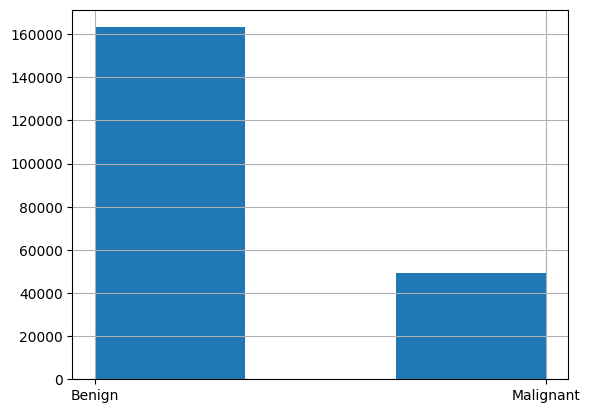

In [7]:
# Histogram showing the number of benign and malignant results

import matplotlib.pyplot as plt

df["Diagnosis"].hist(bins=3)
plt.show()

In [8]:
# Convert categorical data into numerical representations
# Label encoder is used for binary columns 
# One hot encoder is used for columns with more than 2 categories

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
binary_categorical = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Diagnosis']
categorical = ['Country', 'Ethnicity', 'Thyroid_Cancer_Risk']

for col in binary_categorical:

    df[col] = encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=categorical)

In [9]:
# Check which value Benign and Malignant were assigned to (should be alphabetical)

label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(label_mapping)

{'Benign': np.int64(0), 'Malignant': np.int64(1)}


In [10]:
# View correlation of features to Diagnosis

correlation_matrix = df.corr()
correlation_matrix["Diagnosis"]

Age                           0.000115
Gender                       -0.001439
Family_History                0.140921
Radiation_Exposure            0.089043
Iodine_Deficiency             0.099032
Smoking                       0.000862
Obesity                      -0.001233
Diabetes                     -0.003218
TSH_Level                    -0.002670
T3_Level                     -0.002388
T4_Level                      0.001216
Nodule_Size                  -0.002658
Diagnosis                     1.000000
Country_Brazil               -0.018636
Country_China                -0.023148
Country_Germany              -0.012280
Country_India                 0.113724
Country_Japan                -0.018369
Country_Nigeria              -0.022294
Country_Russia               -0.016643
Country_South Korea          -0.017380
Country_UK                   -0.012835
Country_USA                  -0.017312
Ethnicity_African             0.026007
Ethnicity_Asian               0.139342
Ethnicity_Caucasian      

In [ ]:
# Set y to our target column and X to the rest of the feature columns

X = df.drop('Diagnosis', axis=1)
X = X.values
y = df['Diagnosis']
y = y.values

In [12]:
# Split the data into training and test data, 20% test data, 80% training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialise the kNN model

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

In [14]:
# Fit the model to the data

model.fit(X_train, y_train);

In [15]:
# Calculate root mean square error
# This tells us the average prediction error
# A lower RMSE indicates a better model performance

from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = model.predict(X_train)
train_preds = (train_preds >= 0.5).astype(int)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.3752536089790017

In [16]:
# Repeat process on test data

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

0.4795593783832523

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     32615
           1       0.51      0.35      0.41      9924

    accuracy                           0.77     42539
   macro avg       0.66      0.62      0.64     42539
weighted avg       0.75      0.77      0.75     42539



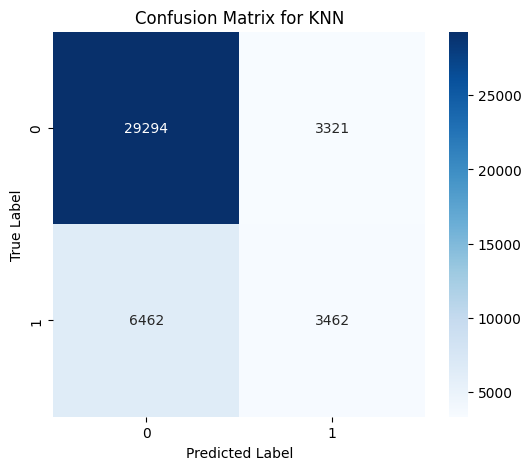

In [17]:
# Analyse performance of model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix of results
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
class_labels = df['Diagnosis'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

Not a terrible accuracy score but metrics for predicting malignant diagnosis are not good, especially for use in the medical field. Metrics when predicting benign diagnosis are good.

In [18]:
# Initialise the kNN model
# Using 5 neighbours instead of 3 to compare results

from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor(n_neighbors=5)

In [19]:
# Fit the model to the data

model2.fit(X_train, y_train);

In [20]:
# Calculate root mean square error
# This tells us the average prediction error
# A lower RMSE indicates a better model performance

train_preds2 = model2.predict(X_train)
train_preds2 = (train_preds2 >= 0.5).astype(int)
mse2 = mean_squared_error(y_train, train_preds2)
rmse2 = sqrt(mse2)
rmse2

0.4020640011236729

In [21]:
# Repeat process on test data

y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 >= 0.5).astype(int)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = sqrt(mse2)
rmse2

0.4565566953614441

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     32615
           1       0.59      0.34      0.43      9924

    accuracy                           0.79     42539
   macro avg       0.71      0.63      0.65     42539
weighted avg       0.77      0.79      0.77     42539



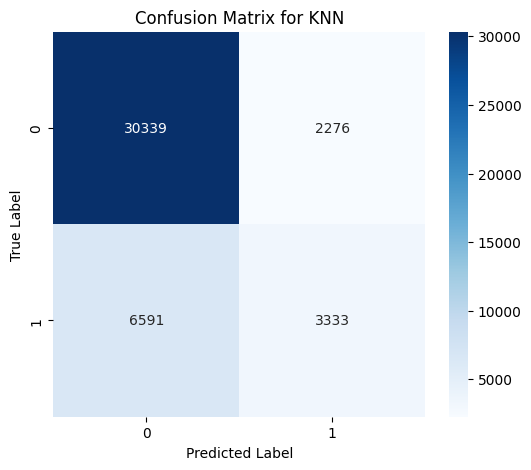

In [22]:
# Analyse performance of model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Display confusion matrix of results
cm = confusion_matrix(y_test, y_pred2)


plt.figure(figsize=(6,5))
class_labels = df['Diagnosis'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

Slightly better results than using k=3. Better overall accuracy and every other metric saw either the same result or improvement except malignant diagnosis recall score which saw a decrease of 0.01. 

In [23]:
# Initilise a classifier model
# This uses the majority result of the neighbours instead of regression and rounding to the nearest value

from sklearn.neighbors import KNeighborsClassifier

classifier_model = KNeighborsClassifier(n_neighbors=3)

In [24]:
# Fit the model to the data

classifier_model.fit(X_train, y_train);

In [25]:
# Calculate root mean square error
# This tells us the average prediction error
# A lower RMSE indicates a better model performance

train_preds = classifier_model.predict(X_train)
train_preds = (train_preds >= 0.5).astype(int)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.3752536089790017

In [26]:
# Repeat process on test data

classifier_pred = classifier_model.predict(X_test)
classifier_pred = (classifier_pred >= 0.5).astype(int)
classifier_mse = mean_squared_error(y_test, classifier_pred)
classifier_rmse = sqrt(classifier_mse)
classifier_rmse

0.4795593783832523

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     32615
           1       0.51      0.35      0.41      9924

    accuracy                           0.77     42539
   macro avg       0.66      0.62      0.64     42539
weighted avg       0.75      0.77      0.75     42539



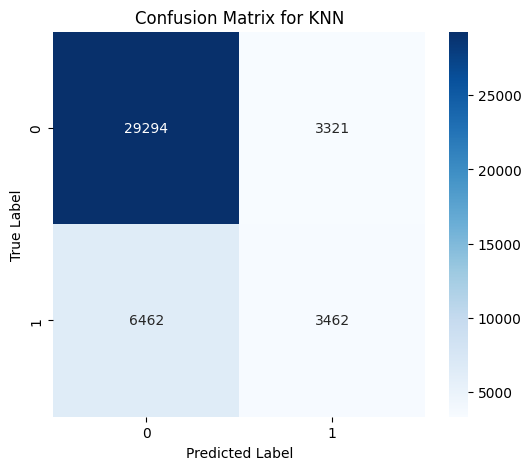

In [27]:
# Analyse performance of model

# Calculate accuracy
accuracy = accuracy_score(y_test, classifier_pred)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, classifier_pred))

# Display confusion matrix of results
cm = confusion_matrix(y_test, classifier_pred)


plt.figure(figsize=(6,5))
class_labels = df['Diagnosis'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

No change in any accuracy measurement from using regression and rounding.

In [28]:
classifier_model2 = KNeighborsClassifier(n_neighbors=5)

In [29]:
classifier_model2.fit(X_train, y_train);

In [30]:
# Calculate root mean square error
# This tells us the average prediction error
# A lower RMSE indicates a better model performance

train_preds = classifier_model2.predict(X_train)
train_preds = (train_preds >= 0.5).astype(int)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.4020640011236729

In [31]:
# Repeat process on test data

classifier_pred2 = classifier_model2.predict(X_test)
classifier_pred2 = (classifier_pred2 >= 0.5).astype(int)
classifier_mse2 = mean_squared_error(y_test, classifier_pred2)
classifier_rmse2 = sqrt(classifier_mse2)
classifier_rmse2

0.4565566953614441

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     32615
           1       0.59      0.34      0.43      9924

    accuracy                           0.79     42539
   macro avg       0.71      0.63      0.65     42539
weighted avg       0.77      0.79      0.77     42539



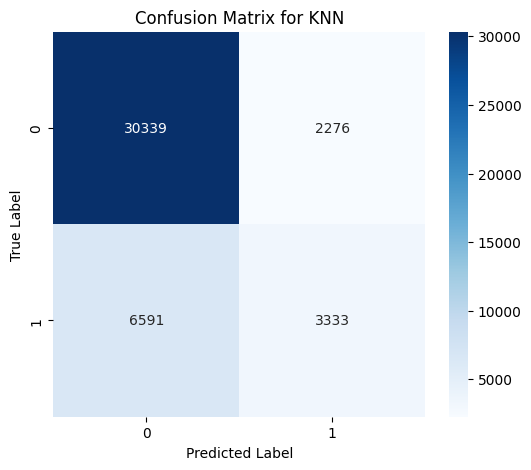

In [32]:
# Analyse performance of model

# Calculate accuracy
accuracy = accuracy_score(y_test, classifier_pred2)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, classifier_pred2))

# Display confusion matrix of results
cm = confusion_matrix(y_test, classifier_pred2)


plt.figure(figsize=(6,5))
class_labels = df['Diagnosis'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

No change in any accuracy measurement from using regression and rounding.

In [ ]:
# Test classifier with k values from 1-49 to find the best value

from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

C:\Users\Seán\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
# Get the best value for k

gridsearch.best_params_

{'n_neighbors': 13}

In [ ]:
# Calculate root mean square error
# This tells us the average prediction error
# A lower RMSE indicates a better model performance

train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print(train_rmse)
print(test_rmse)

0.4216492563138704
0.4407059937886965


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     32615
           1       0.69      0.31      0.42      9924

    accuracy                           0.81     42539
   macro avg       0.75      0.63      0.65     42539
weighted avg       0.79      0.81      0.78     42539



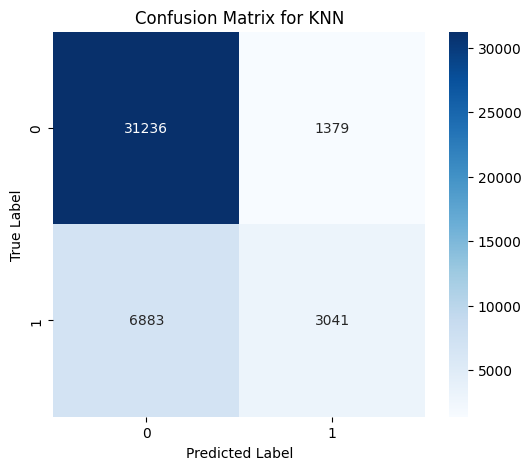

In [36]:
# Analyse performance of model

# Calculate accuracy
accuracy = accuracy_score(y_test, test_preds_grid)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, test_preds_grid))

# Display confusion matrix of results
cm = confusion_matrix(y_test, test_preds_grid)


plt.figure(figsize=(6,5))
class_labels = df['Diagnosis'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

Using the gridsearch best params, there is a further increase in most accuracy measurements. The largest improvement being to malignant diagnosis precision, which saw and increase of 0.10. However, both malignant diagnosis recall and f1 score both saw a reduction in score.

In [ ]:
# Find best value for k
# Define how neighbour weights should be used
# Uniform means all neighbours are weighed evenly
# Distance means closer neighbours have a greater influence on the prediction

parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)



gridsearch.best_params_

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.4388350762766816

In [ ]:
# Create classifier model

best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(
    n_neighbors=best_k, weights=best_weights
)

In [ ]:
# Initialise bagging model

from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(bagged_knn, n_estimators=100)

In [ ]:
# Fit model to the data
# Calculate root mean square error
# This tells us the average prediction error
# A lower RMSE indicates a better model performance

bagging_model.fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.44006543241264967

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     32615
           1       0.69      0.30      0.42      9924

    accuracy                           0.81     42539
   macro avg       0.76      0.63      0.65     42539
weighted avg       0.79      0.81      0.78     42539



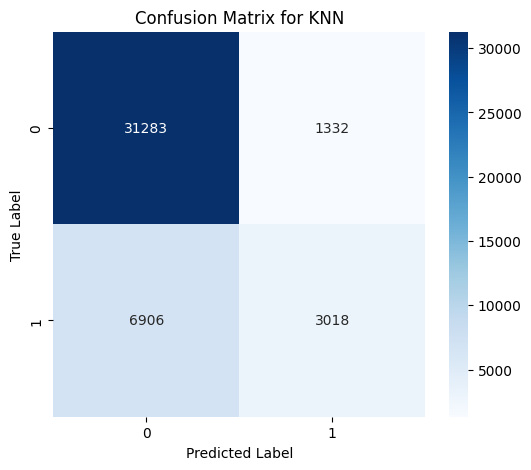

In [43]:
# Analyse performance of model

# Calculate accuracy
accuracy = accuracy_score(y_test, test_preds_grid)
print(f'Accuracy: {accuracy:.2}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, test_preds_grid))

# Display confusion matrix of results
cm = confusion_matrix(y_test, test_preds_grid)


plt.figure(figsize=(6,5))
class_labels = df['Diagnosis'].unique() 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()

#### Results

Using the bagging model saw no improvement to the accuracy scores. Only a reduction of malignant diagnosis recall by 0.01.